# Data Understanding
#### **Overview.**
This project explores the prediction of heart attack risk based on a medical dataset.

The datase is from Kaggle, It has a 9.41 usability score and comprises of 1319 samples, each representing a patient with various medical features used to predict whether or not the patient has experienced a heart attack.

The input variables represent several critical health metrics, while the output is a binary classification indicating the presence or absence of a heart attack.

**Below is an overview of the fields in this dataset:**

1. **Age**: The age of the patient in years.
2. **Gender**: The gender of the patient, where 0 represents female and 1 represents male.
3. **Heart Rate (Impulse)**: The number of heartbeats per minute (bpm).
4. **Systolic Blood Pressure (Pressure High)**: The systolic blood pressure, representing the pressure in the arteries when the heart beats.
5. **Diastolic Blood Pressure (Pressure Low)**: The diastolic blood pressure, representing the pressure in the arteries when the heart is at rest between beats.
6. **Blood Sugar (Glucose)**: The glucose level in the patient’s blood.
7. **CK-MB (KCM)**: A measure of creatine kinase-MB, an enzyme released when the heart muscle is damaged, commonly used to diagnose heart attacks.
8. **Troponin**: A cardiac-specific enzyme that indicates heart muscle damage. Elevated troponin levels are a strong indicator of heart attack.
9. **Class (Heart Attack)**: The target variable indicating whether the patient had a heart attack. It is binary, with two possible values:
* *Negative: No heart attack*
* *Positive: Heart attack*

#### **Example Data Snippet.**
---
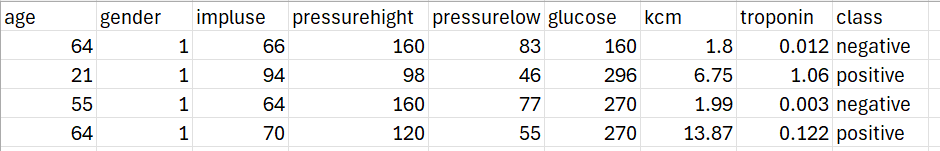

 In this project, I want to leverage machine learning techniques to build a predictive model that can classify patients into the two categories: those at risk of having a heart attack (positive class) and those not at risk (negative class).
#### **Goal of the Project.**
---
The goal of this project is to create an accurate and efficient model that could potentially aid in medical diagnostics or serve as a foundation for further research in cardiovascular disease prediction.


# Data Preprocessing

## Loading & Exploring Data

In [ ]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Started by loading the dataset
import pandas as pd
hdata = pd.read_csv('/content/drive/My Drive/Heart Disease Classification/Heart Attack.csv')

# Previewing the first five rows of my data
hdata.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
#Generating summary statistics of my dataset
hdata.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
#checking for missing values
hdata.isnull().sum()

,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


In [ ]:
#check for duplicates
hdata.duplicated().sum()

0

In [ ]:
# Determining the data types of columns in my dataset
hdata.dtypes

,0
age,int64
gender,int64
impluse,int64
pressurehight,int64
pressurelow,int64
glucose,float64
kcm,float64
troponin,float64
class,object


In [ ]:
# Checking for improperly incorrect values in the gender column(expecting [0,1])
print(hdata['gender'].unique())

[1 0]


## Data Cleaning & Feature Engineering

In [ ]:
# Renaming the column headers
hdata.rename(columns={'impluse':'bpm','pressurehight':'pressure_high','pressurelow':'pressure_low'}, inplace=True)

In [ ]:
# Label encoding for my target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hdata['heart_disease'] = le.fit_transform(hdata['class'])

#dropping the class column to avoid redundancy
hdata.drop('class', axis=1, inplace=True)
hdata.head()

,age,gender,bpm,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
# Confirming if we have correctly encoded our categorical data
hdata.dtypes

,0
age,int64
gender,int64
bpm,int64
pressure_high,int64
pressure_low,int64
glucose,float64
kcm,float64
troponin,float64
heart_disease,int64


# Data Visualisation

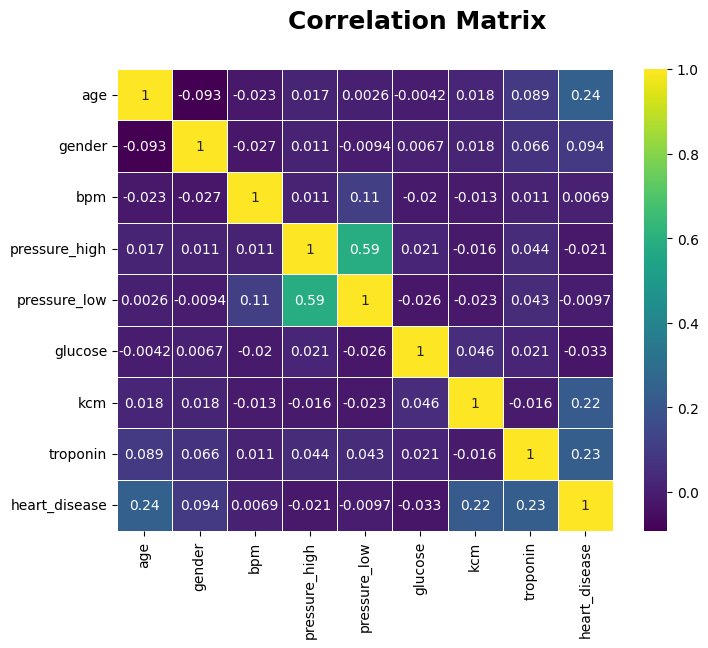

In [ ]:
#PLot a correlation matrix to view relationships between dataset
corr_matrix=hdata.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='viridis',linewidths=0.5)
plt.suptitle('Correlation Matrix',fontsize=18,fontweight='bold')
plt.show()

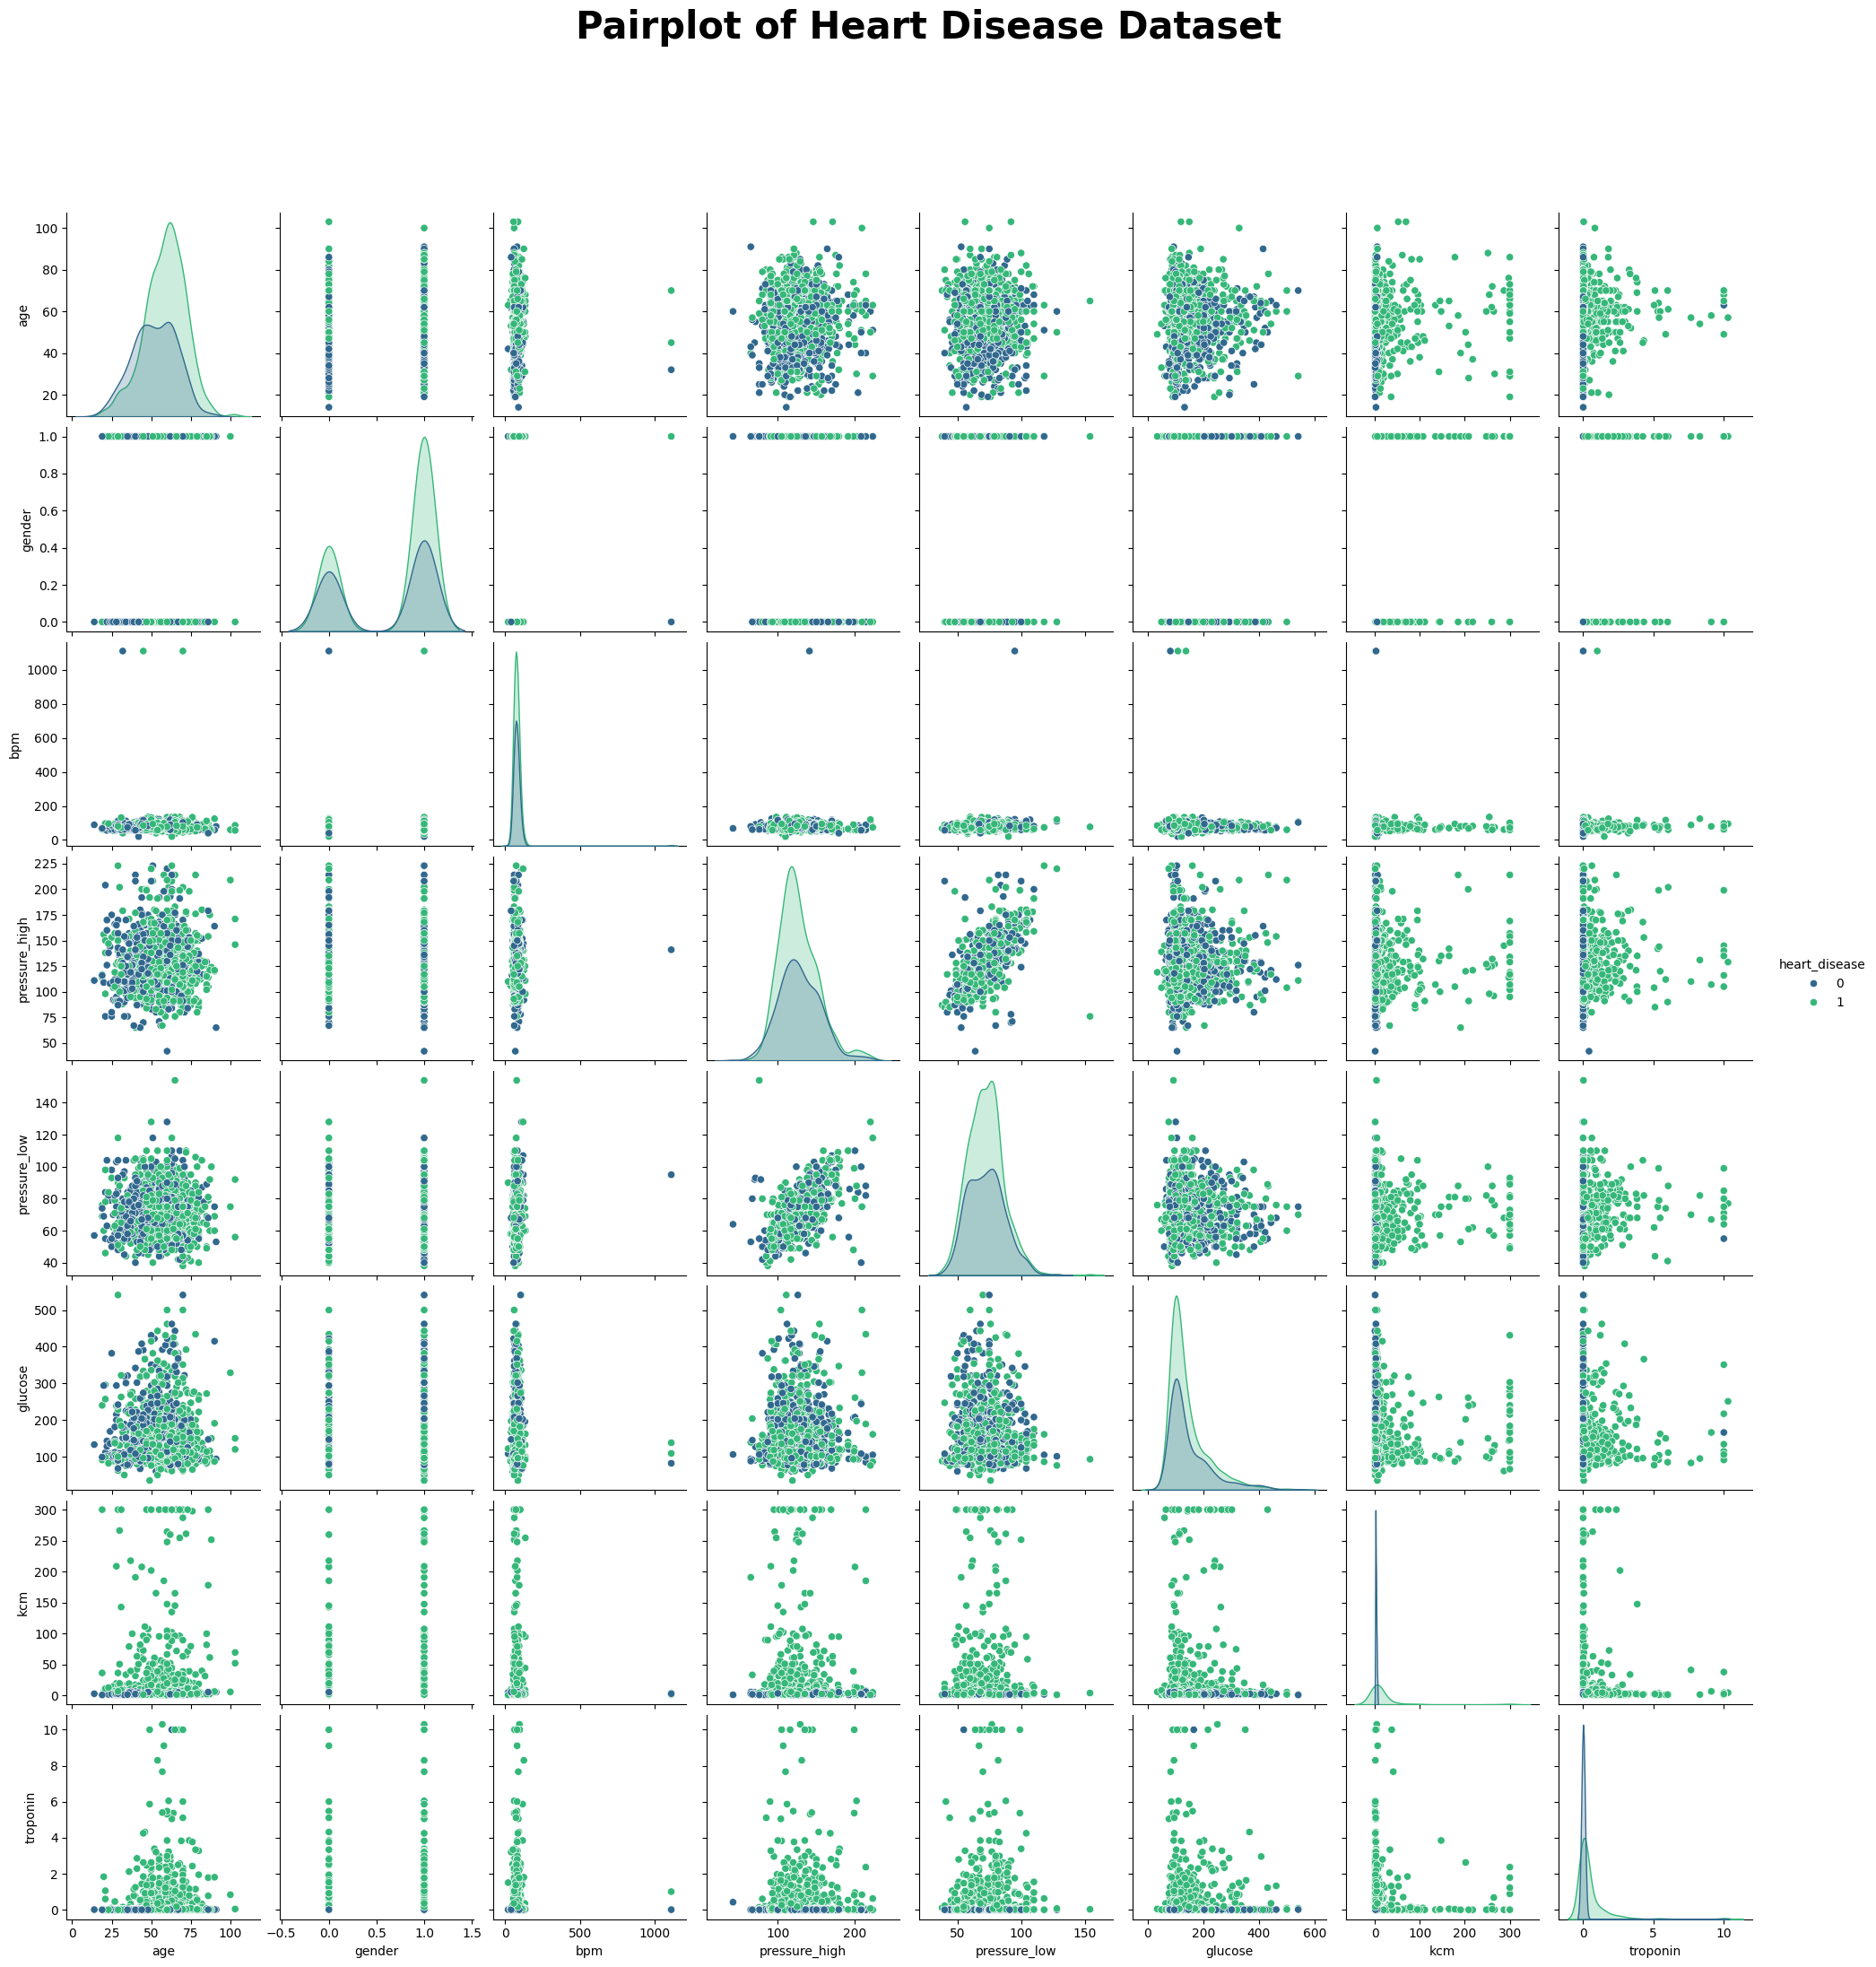

In [ ]:
# Visualizing my dataset to determine relationship between features
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(hdata, hue='heart_disease', palette='viridis')
plt.suptitle('Pairplot of Heart Disease Dataset',fontsize=30, fontweight='bold', y=1.1)
plt.show()

Text(0.5, 1.0, 'Countplot of Patients with and Without Heart Attacks')

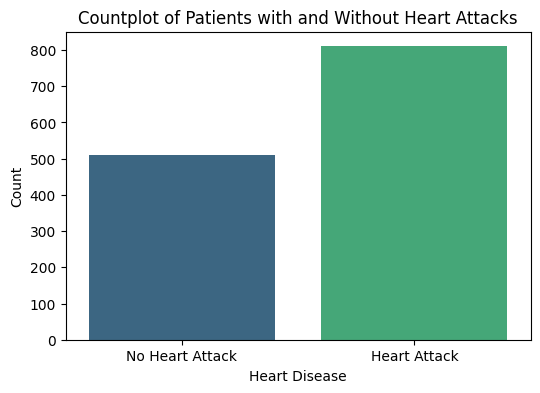

In [ ]:
#Visualise the distribution of heart attack patients and no risk
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', data=hdata, palette='viridis')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.title('Countplot of Patients with and Without Heart Attacks')

Text(0, 0.5, 'Count')

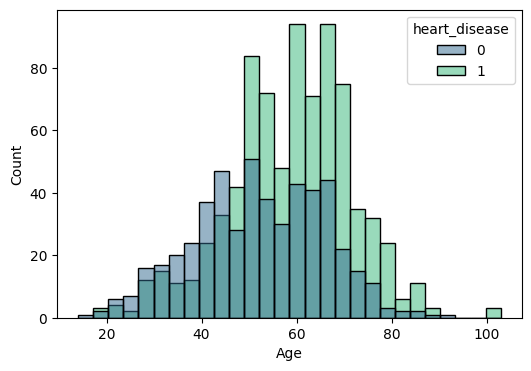

In [ ]:
#Visualise the age and patients suffering from heart attack
plt.figure(figsize=(6, 4))
sns.histplot(data=hdata, x='age', hue='heart_disease', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

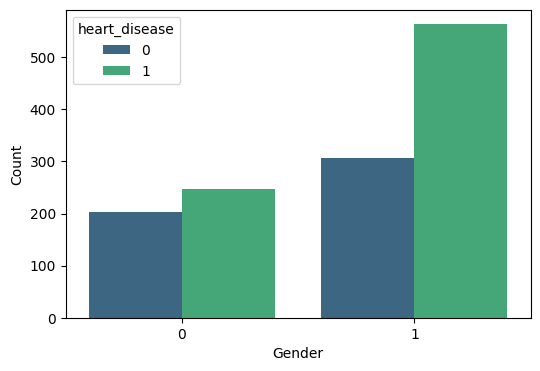

In [ ]:
#visualisation of gender and patients suffering from a heart attack
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=hdata, hue='heart_disease', palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')

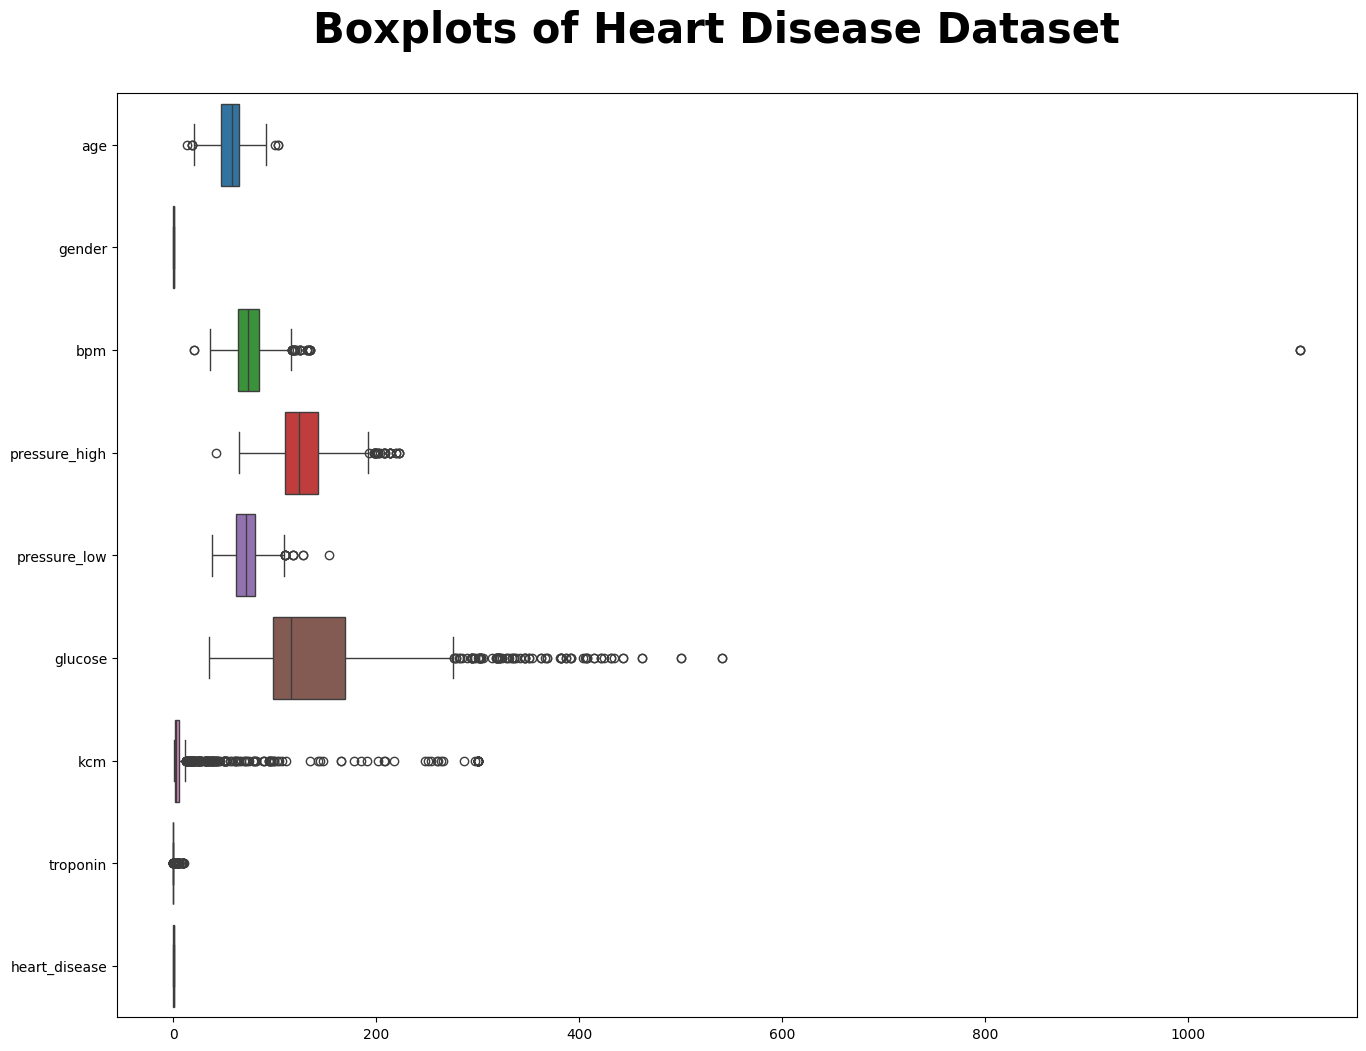

In [ ]:
#Plotting boxplots to identify outliers
plt.figure(figsize=(16, 12))
sns.boxplot(hdata,orient='h')
plt.suptitle('Boxplots of Heart Disease Dataset',fontsize=30, fontweight='bold', y=0.95)
plt.show()

In [ ]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (data[column] < low_b) | (data[column] > high_b)

            if outliers.any():
                print(f"{column}: has outliers")
                data[column] = np.where(data[column] < low_b, low_b,
                                    np.where(data[column] > high_b, high_b, data[column]))
            else:
                print(f"{column}: no outliers")

    return data

num_col = hdata.select_dtypes(include='number').columns
hdata = handle_outliers(hdata, num_col)

age: has outliers
gender: no outliers
bpm: has outliers
pressure_high: has outliers
pressure_low: has outliers
glucose: has outliers
kcm: has outliers
troponin: has outliers
heart_disease: no outliers


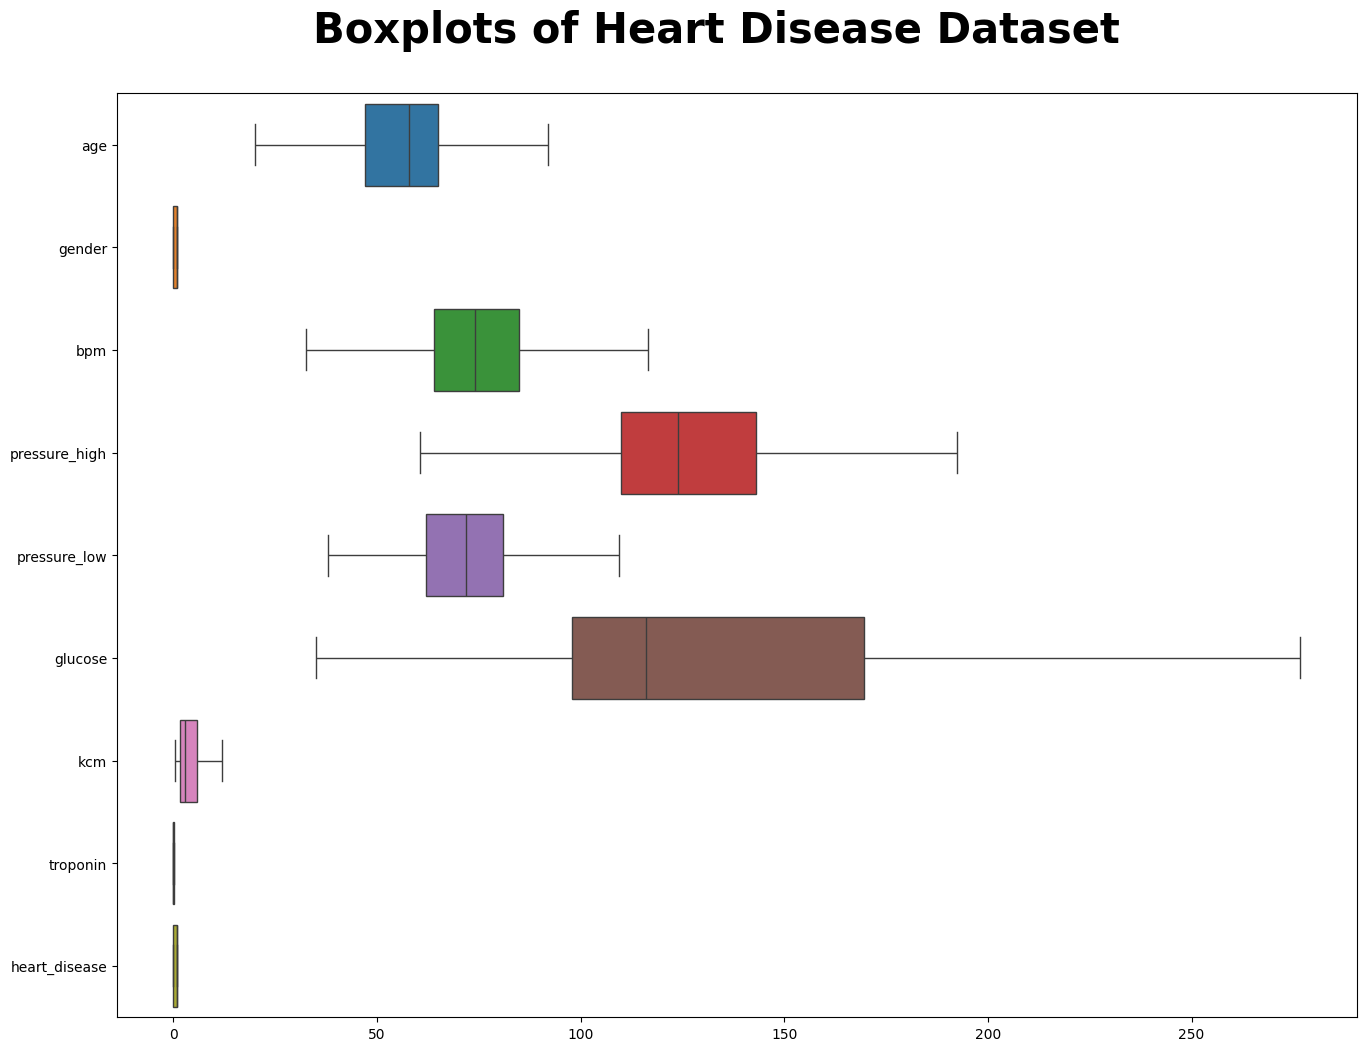

In [ ]:
#check if there are any remaining outliers
plt.figure(figsize=(16, 12))
sns.boxplot(hdata,orient='h')
plt.suptitle('Boxplots of Heart Disease Dataset',fontsize=30, fontweight='bold', y=0.95)
plt.show()

# Machine Learning Models

In [ ]:
# Feature separation
X = hdata.drop('heart_disease', axis=1)
y = hdata['heart_disease']

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1055, 8) (264, 8)


## Logistic regression model



### Building and Training a logistic Regression Model

In [ ]:
# Importing relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training and Predicting
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)




### Evaluating my Logistic Regression Model

Accuracy: 0.8863636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       101
           1       0.91      0.91      0.91       163

    accuracy                           0.89       264
   macro avg       0.88      0.88      0.88       264
weighted avg       0.89      0.89      0.89       264

Confusion Matrix:
 [[ 86  15]
 [ 15 148]]


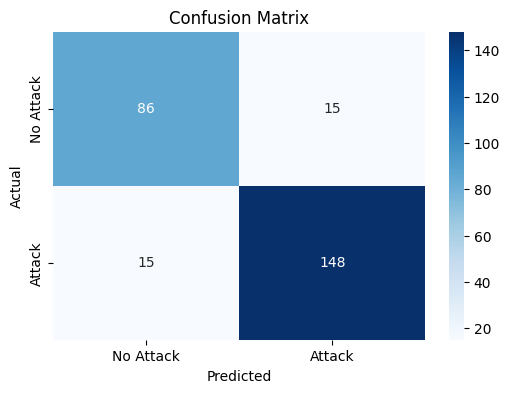

In [ ]:
# Evaluating my log model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


         Feature  Coefficient
7       troponin     7.909370
6            kcm     2.150826
0            age     0.466597
1         gender     0.116263
4   pressure_low     0.075691
3  pressure_high    -0.029697
2            bpm    -0.058544
5        glucose    -0.111400


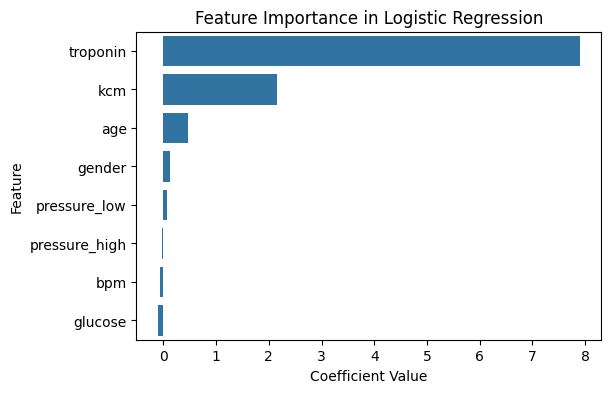

In [ ]:
# Visualising feature Importance
coefficients = logmodel.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
sns.color_palette("viridis", as_cmap=True)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [ ]:
# Calculating RMSE and Adjusted R-squared for Logistic regression model
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.11363636363636363
MSE: 0.11363636363636363
R-squared: 0.5189212172751019


## Random Forest Classifier

### Building and Training a Random forest classifier model


In [ ]:
# building and Training a Random forest classifier model
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model

In [ ]:
# Generate predictions using the trained model
y_pred = rfc_model.predict(X_test)

### Evaluating my Random Forest Classifier

Accuracy: 0.9810606060606061
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Confusion Matrix:
 [[ 98   3]
 [  2 161]]


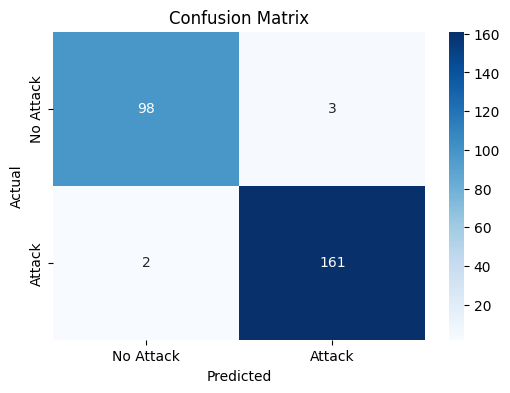

In [ ]:
# Evaluating my RFC model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
RF_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", RF_report)
print("Confusion Matrix:\n", confusion_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

         Feature  Importance
7       troponin    0.572943
6            kcm    0.261394
0            age    0.052809
5        glucose    0.031968
3  pressure_high    0.026641
4   pressure_low    0.023257
2            bpm    0.018580
1         gender    0.012407


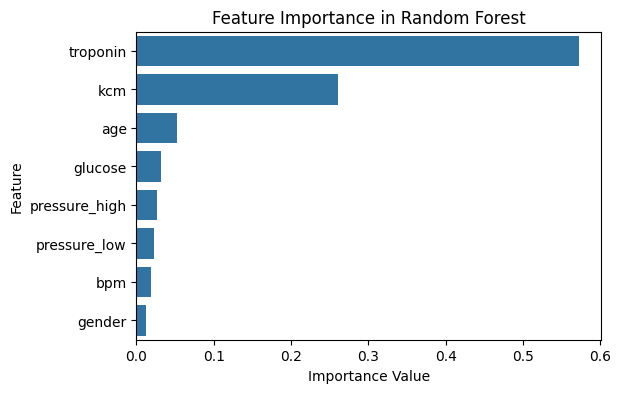

In [ ]:
# Visualising feature Importance
importances = rfc_model.feature_importances_ # Added underscore to the end of the attribute name
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
coef_df = coef_df.sort_values(by='Importance', ascending=False)
print(coef_df)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=coef_df)
sns.color_palette("viridis", as_cmap=True)
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
# Calculating RMSE and Adjusted R-squared for RFC model
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.01893939393939394
MSE: 0.01893939393939394
R-squared: 0.9198202028791836
